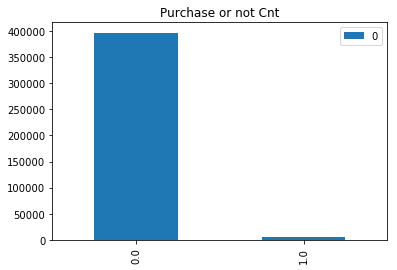

In [61]:
from collections import Counter
y_test.head()

pred = Counter(y_test["class_pred"])
df = pd.DataFrame.from_dict(pred, orient='index')
%matplotlib inline
df.plot(kind='bar', title = "Purchase or not Cnt")

In [48]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import svm
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [22]:

df_train = pd.read_csv("../cleaned_train.csv")
df_test = pd.read_csv("cleaned_test.csv")
df_train = df_train.drop(columns = ['Unnamed: 0'])
df_test = df_test.drop(columns = ['Unnamed: 0'])

In [25]:
y_train = df_train[['class_pred','totals.transactionRevenue','fullVisitorId']]

df_train = df_train.drop(columns = ['class_pred','totals.transactionRevenue', 'fullVisitorId'])

In [27]:
y_test = df_test[['class_pred','totals.transactionRevenue','fullVisitorId']]


df_test = df_test.drop(columns = ['class_pred','totals.transactionRevenue', 'fullVisitorId'])

# Fit PCA

In [30]:
#PCA keeping 95% of variance
pca = PCA(.95)

pca.fit(df_train)
X_train_pca = pca.transform(df_train)
X_test_pca = pca.transform(df_test)
print(pca.singular_values_)  



[2315.42228114 1811.01058773 1547.51011668 1317.10404267 1282.70200054
  827.66642827  810.08137172  781.24518271  737.78858198  667.37487103
  663.02777019  638.41696576  601.43460109  574.38798204  563.26687174
  547.08143274  539.04099311  527.08332953  482.72372859  462.15182241
  388.91288237]


# Fit Random Forest

In [31]:
rf_pca = RandomForestClassifier(n_estimators=100, min_samples_leaf = .1, random_state=0, class_weight='balanced')
# print(cross_val_score(rf_pca, X_train_pca, y_train_class, cv=3))

rf_pca.fit(X_train_pca, y_train['class_pred'])
y_pred_pca = rf_pca.predict(X_test_pca)


print("Confusion matrix PCA: ", confusion_matrix(y_test['class_pred'], y_pred_pca))
print("f1-score PCA: ", f1_score(y_test['class_pred'], y_pred_pca))

('Confusion matrix PCA: ', array([[352418,  44577],
       [    94,   4500]]))
('f1-score PCA: ', 0.16768832330308733)


# Fit Lasso/Ridge/RF regression ensemble

In [28]:
# X_Reg = X_test[y_pred_pca ==1]
# y_Reg = y_test[y_pred_pca == 1]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_Reg, y_Reg, test_size=0.33, shuffle = False)

In [33]:
#or train on same training as classification
X_train_reg = df_train[y_train['class_pred']==1]
y_train_reg = y_train[y_train['class_pred']==1]

X_test_reg = df_test[y_pred_pca ==1]
y_test_reg = y_test[y_pred_pca == 1]

In [35]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'log2', min_samples_leaf= 0.001) 
# ridge = Ridge(alpha = .202)
# lasso = Lasso(alpha = 1e-15)
svr = svm.SVR(C= 10000.0, degree = 3, kernel = 'poly')

rf.fit(X_train_reg, y_train_reg['totals.transactionRevenue'])
# ridge.fit(X_train_reg, y_train_reg['totals.transactionRevenue'])
# lasso.fit(X_train_reg, y_train_reg['totals.transactionRevenue'])
svr.fit(X_train_reg, y_train_reg['totals.transactionRevenue'])


rf_pred = rf.predict(X_test_reg)
# ridge_pred = ridge.predict(X_test_reg)
# lasso_pred = lasso.predict(X_test_reg)
svr_pred = svr.predict(X_test_reg)




/Users/cassidylitch/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
# pred_all = pd.DataFrame({"random_forest": rf_pred, "ridge": ridge_pred, "lasso": lasso_pred, "svr": svr_pred}).mean(axis=1)
pred_rf_svr = pd.DataFrame({"random_forest": rf_pred, "svr": svr_pred}).mean(axis=1)
# pred_rf_svr_lass = pd.DataFrame({"random_forest": rf_pred, "svr": svr_pred, "lasso": lasso_pred}).mean(axis=1)

In [38]:
import math
# mse_all=mean_squared_error(y_test_reg['totals.transactionRevenue'], pred_all)
# rmse_all=math.sqrt(mse_all)
# print("All: root mean squared error", rmse_all)

mse_rf_svr=mean_squared_error(y_test_reg['totals.transactionRevenue'], pred_rf_svr)
rmse_rf_svr=math.sqrt(mse_rf_svr)
print("RF/SVR: root mean squared error", rmse_rf_svr)


# mse_rf_svr_lass=mean_squared_error(y_test_reg['totals.transactionRevenue'], pred_rf_svr_lass)
# rmse_rf_svr_lass=math.sqrt(mse_rf_svr_lass)
# print("RF/SVR/Lasso: root mean squared error", rmse_rf_svr_lass)


# mse_rf=mean_squared_error(y_test_reg['totals.transactionRevenue'], rf_pred)
# rmse_rf=math.sqrt(mse_rf)
# print("RF: root mean squared error", rmse_rf)

# mse_ridge=mean_squared_error(y_test_reg['totals.transactionRevenue'], ridge_pred)
# rmse_ridge=math.sqrt(mse_ridge)
# print("Ridge: root mean squared error", rmse_ridge)

# mse_lasso=mean_squared_error(y_test_reg['totals.transactionRevenue'], lasso_pred)
# rmse_lasso=math.sqrt(mse_lasso)
# print("Lasso:root mean squared error", rmse_lasso)

# mse_svr=mean_squared_error(y_test_reg['totals.transactionRevenue'], svr_pred)
# rmse_svr=math.sqrt(mse_svr)
# print("svr:root mean squared error", rmse_svr)

('RF/SVR: root mean squared error', 179530051.42460448)


In [113]:
# import numpy as np
# np.sort([rmse_comb, rmse_rf, rmse_ridge, rmse_lasso, rmse_svr])

array([1.37889051e+08, 1.67847929e+08, 2.81691105e+08, 3.39250199e+08,
       4.01394158e+08])

In [39]:
#Combine results like Kaggle wants

#y_test['final_prediction'] = y_pred_pca

def addFinalPrediction(classPred, regPred):
    total_pred = []
    cnt = 0
    for x in classPred: 
        if x == 0:
            total_pred.append(x)
        else:
            total_pred.append(regPred[cnt])
            cnt +=1
    return total_pred
        
        
        
y_test['final_pred'] = addFinalPrediction(y_pred_pca, pred_rf_svr)

In [43]:
list(y_test)

['class_pred', 'totals.transactionRevenue', 'fullVisitorId', 'final_pred']

In [62]:
mse=mean_squared_error(y_test['totals.transactionRevenue'], y_test['final_pred'])
# mse=mean_squared_error(y_test['totals.transactionRevenue'], np.zeros(len(y_test)))


rmse=math.sqrt(mse)
print("Final prediction per entry: ", rmse)

('Final prediction per entry: ', 59039153.91496672)


In [64]:
list(y_test)

['totals.transactionRevenue',
 'class_pred',
 'fullVisitorId',
 'final_prediction']

# Combine by User for Kaggle

In [45]:
#group predicted/true values by id number
group = y_test.groupby('fullVisitorId')

dfpredictions = group.apply(lambda x: x['final_pred'].unique())
dftrue = group.apply(lambda x: x['totals.transactionRevenue'].unique())




In [56]:
type(dfpredictions)

pandas.core.series.Series

In [46]:
concatenated = pd.concat([dfpredictions, dftrue], axis=1)
concatenated.rename(columns={0: "PredictedLogRevenue", 1: "true"},inplace = True)
concatenated.head()

,PredictedLogRevenue,true
fullVisitorId,,
1995526696366,[0.0],[0.0]
16367580689231,[0.0],[0.0]
18966949534117,[0.0],[0.0]
24844201502183,[0.0],[0.0]
24845665201193,[0.0],[0.0]


In [49]:
def sumSeries(df, col):
    newCol = []
    for x in df[col]:
#         print(np.sum(x) + 1)
        if np.sum(x) <0:
            newCol.append(math.log( 1))
        else:
            newCol.append(math.log(np.sum(x) + 1))
    return newCol

concatenated['PredictedLogRevenue'] = sumSeries(concatenated, 'PredictedLogRevenue')
print("done 1")
concatenated['true'] = sumSeries(concatenated, 'true')
concatenated['fullVisitorId'] = y


done 1


In [64]:
mse=mean_squared_error(concatenated['true'],concatenated['PredictedLogRevenue'])
# mse=mean_squared_error(concatenated['true'],np.zeros(len(concatenated)))


rmse=math.sqrt(mse)
print(rmse)

6.28231122638


In [53]:
finalRes = concatenated[['PredictedLogRevenue', 'fullVisitorId']]

KeyError: "['fullVisitorId'] not in index"

In [54]:
list(concatenated)

['PredictedLogRevenue', 'true']

In [75]:
testing = concatenated.sort_values('PredictedLogRevenue')

In [80]:
print(len(testing))

300364


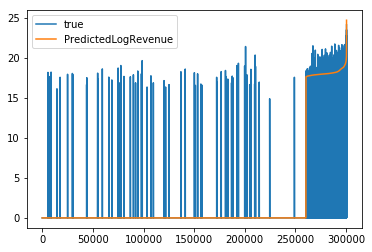

In [79]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, len(testing)), testing['true'])
plt.plot(np.arange(0, len(testing)), testing['PredictedLogRevenue'])
plt.legend()
plt.show()

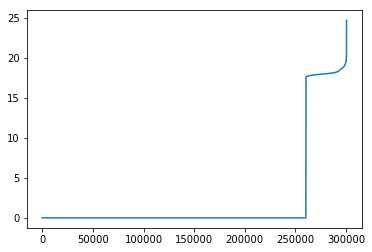

In [77]:
plt.plot(np.arange(0, len(testing)), testing['PredictedLogRevenue'])



In [74]:
testing['PredictedLogRevenue']

fullVisitorId
1995526696366           0.000000
6613263762584122284     0.000000
6613241343663668699     0.000000
6613229272476998866     0.000000
6613182830594667263     0.000000
6613161975749469844     0.000000
6613083737965180977    17.906832
6613269222945232542     0.000000
6613056414841277866     0.000000
6613003077496775836     0.000000
6612995130262270672     0.000000
6612979507692801787     0.000000
6612958630416075773     0.000000
6612875089566766329    18.601925
6612855124042074561     0.000000
6613045415744081799     0.000000
6612840722156871437     0.000000
6613285875535254802     0.000000
6613350546629999093     0.000000
6613952549933475230    18.324433
6613892916772523735     0.000000
6613859745769653954     0.000000
6613857542502442228     0.000000
6613834706342630226     0.000000
6613759261141643318     0.000000
6613317938479024930    17.957796
6613747657611618055     0.000000
6613662553260754845     0.000000
6613634216029955909     0.000000
6613615847700766847    18.416

In [81]:
df_test.shape

(401589, 57)